In [1]:
import pandas as pd

# TASK 2
from sklearn.preprocessing import MinMaxScaler 

# TASK 3a
from sklearn import linear_model
import statsmodels.api as sm

# Task 4
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn import metrics
import pydot

from sklearn.neighbors import KNeighborsClassifier 

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
merged = pd.read_csv("merged.csv")
merged.head()

,Unnamed: 0,State,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",...,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party,Percent Age between 30 and 64 inclusive,Percent Male,Percent more than High School Degree,Percent more than Bachelor's Degree,Citizen Voting-Age Population voted
0,0,AZ,apache,16298.0,7810.0,4001,72346,NaN,18.571863,0.486551,...,15.807433,21.758252,88.941063,74.061076,Demo,40.823266,49.401487,78.241748,11.058937,24108.0
1,1,AZ,cochise,17383.0,26929.0,4003,128177,92915.0,56.299492,3.714395,...,8.567108,13.409171,76.837055,36.301067,Rep,42.341450,50.930354,86.590829,23.162945,44312.0
2,2,AZ,coconino,34240.0,19249.0,4005,138064,104265.0,54.619597,1.342855,...,8.238305,11.085381,65.791439,31.466066,Demo,40.179917,49.418386,88.914619,34.208561,53489.0
3,3,AZ,gila,7643.0,12180.0,4007,53179,NaN,63.222325,0.552850,...,12.129932,15.729958,82.262624,41.062000,Rep,41.364072,49.703830,84.270042,17.737376,19823.0
4,4,AZ,graham,3368.0,6870.0,4009,37529,NaN,51.461536,1.811932,...,14.424104,14.580797,86.675944,46.437399,Rep,41.290735,53.686482,85.419203,13.324056,10238.0


In [3]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
Unnamed: 0                                 1200 non-null int64
State                                      1200 non-null object
County                                     1200 non-null object
Democratic                                 1200 non-null float64
Republican                                 1200 non-null float64
FIPS                                       1200 non-null int64
Total Population                           1200 non-null int64
Citizen Voting-Age Population              520 non-null float64
Percent White, not Hispanic or Latino      1200 non-null float64
Percent Black, not Hispanic or Latino      1200 non-null float64
Percent Hispanic or Latino                 1200 non-null float64
Percent Foreign Born                       1200 non-null float64
Percent Female                             1200 non-null float64
Percent Age 29 and Under                   1200 non-null 

In [4]:
merged = merged.drop(["Unnamed: 0","Citizen Voting-Age Population", "Citizen Voting-Age Population voted", 
                      "Percent Male", "Percent Age between 30 and 64 inclusive", 
                      "Percent more than High School Degree","Percent more than Bachelor's Degree"], axis = 1)


In [5]:
merged = merged[(merged[["Democratic", "Republican"]] != 0).all(axis = 1)]

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1199
Data columns (total 19 columns):
State                                    1195 non-null object
County                                   1195 non-null object
Democratic                               1195 non-null float64
Republican                               1195 non-null float64
FIPS                                     1195 non-null int64
Total Population                         1195 non-null int64
Percent White, not Hispanic or Latino    1195 non-null float64
Percent Black, not Hispanic or Latino    1195 non-null float64
Percent Hispanic or Latino               1195 non-null float64
Percent Foreign Born                     1195 non-null float64
Percent Female                           1195 non-null float64
Percent Age 29 and Under                 1195 non-null float64
Percent Age 65 and Older                 1195 non-null float64
Median Household Income                  1195 non-null int64
Percent Unemployed 

In [7]:
merged2 = pd.read_csv("merged_train.csv")
merged2.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [8]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 19 columns):
State                                    1195 non-null object
County                                   1195 non-null object
FIPS                                     1195 non-null int64
Total Population                         1195 non-null int64
Percent White, not Hispanic or Latino    1195 non-null float64
Percent Black, not Hispanic or Latino    1195 non-null float64
Percent Hispanic or Latino               1195 non-null float64
Percent Foreign Born                     1195 non-null float64
Percent Female                           1195 non-null float64
Percent Age 29 and Under                 1195 non-null float64
Percent Age 65 and Older                 1195 non-null float64
Median Household Income                  1195 non-null int64
Percent Unemployed                       1195 non-null float64
Percent Less than High School Degree     1195 non-null float64
Percent Less than B

In [9]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [10]:
merged = merged[["State", "County", "FIPS",
       "Total Population", "Percent White, not Hispanic or Latino",
       "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino",
       "Percent Foreign Born", "Percent Female", "Percent Age 29 and Under",
       "Percent Age 65 and Older", "Median Household Income",
       "Percent Unemployed", "Percent Less than High School Degree",
       "Percent Less than Bachelor's Degree",  
       "Percent Rural",
       "Democratic", "Republican", "Party"]]

In [11]:
merged.columns

Index(['State', 'County', 'FIPS', 'Total Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor's Degree', 'Percent Rural', 'Democratic',
       'Republican', 'Party'],
      dtype='object')

In [12]:
merged.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298.0,7810.0,Demo
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383.0,26929.0,Rep
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240.0,19249.0,Demo
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643.0,12180.0,Rep
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368.0,6870.0,Rep


In [13]:
#X = merged.iloc[:,:17]

#Y = merged.iloc[:,17:19]


In [14]:
# TASK 1
X_train, X_val= train_test_split(merged, test_size = 0.2, random_state = 1)
x_train = X_train.iloc[:,3:16]
x_val =   X_val.iloc[:,3:16]                                             
y_train = X_train.iloc[:,16:19]
y_val = X_val.iloc[:,16:19]


In [15]:
# TASK 1
x_train.head()

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
1002,13122,85.208048,7.117817,2.217650,1.798506,51.150739,34.644109,20.423716,48271,5.308192,14.155202,74.355116,100.000000
879,123601,84.768732,1.466817,11.155250,4.481355,50.174351,38.469753,14.703765,67979,5.564726,10.735275,72.974767,56.084566
401,9055,88.812811,0.077305,9.607951,4.538929,49.442297,36.775262,21.258973,49181,2.541847,12.288761,80.049221,65.204070
134,21026,92.304766,4.418339,1.664606,0.799011,46.142871,35.608294,16.313136,43786,5.646527,13.624489,87.340076,78.961583
510,48713,92.858169,1.426724,2.566050,2.147271,51.187568,43.039846,15.178700,50910,5.166842,9.569456,75.217562,44.273958


In [16]:
# TASK 1
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 49 to 778
Data columns (total 13 columns):
Total Population                         239 non-null int64
Percent White, not Hispanic or Latino    239 non-null float64
Percent Black, not Hispanic or Latino    239 non-null float64
Percent Hispanic or Latino               239 non-null float64
Percent Foreign Born                     239 non-null float64
Percent Female                           239 non-null float64
Percent Age 29 and Under                 239 non-null float64
Percent Age 65 and Older                 239 non-null float64
Median Household Income                  239 non-null int64
Percent Unemployed                       239 non-null float64
Percent Less than High School Degree     239 non-null float64
Percent Less than Bachelor's Degree      239 non-null float64
Percent Rural                            239 non-null float64
dtypes: float64(11), int64(2)
memory usage: 26.1 KB


In [17]:
# TASK 2
scaler = MinMaxScaler(feature_range=(0, 1))
x_train[["Total Population", "Percent White, not Hispanic or Latino",
       "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino",
       "Percent Foreign Born", "Percent Female", "Percent Age 29 and Under",
       "Percent Age 65 and Older", "Median Household Income",
       "Percent Unemployed", "Percent Less than High School Degree",
       "Percent Less than Bachelor's Degree",  
       "Percent Rural"]] = scaler.fit_transform(x_train[["Total Population", "Percent White, not Hispanic or Latino",
       "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino",
       "Percent Foreign Born", "Percent Female", "Percent Age 29 and Under",
       "Percent Age 65 and Older", "Median Household Income",
       "Percent Unemployed", "Percent Less than High School Degree",
       "Percent Less than Bachelor's Degree",  
       "Percent Rural"]])
x_val[["Total Population", "Percent White, not Hispanic or Latino",
       "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino",
       "Percent Foreign Born", "Percent Female", "Percent Age 29 and Under",
       "Percent Age 65 and Older", "Median Household Income",
       "Percent Unemployed", "Percent Less than High School Degree",
       "Percent Less than Bachelor's Degree", 
       "Percent Rural"]] = scaler.fit_transform(x_val[["Total Population", "Percent White, not Hispanic or Latino",
       "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino",
       "Percent Foreign Born", "Percent Female", "Percent Age 29 and Under",
       "Percent Age 65 and Older", "Median Household Income",
       "Percent Unemployed", "Percent Less than High School Degree",
       "Percent Less than Bachelor's Degree", 
       "Percent Rural"]])



In [18]:
# TASK 2
x_val.head()

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
49,0.083065,0.727571,0.191791,0.122607,0.147765,0.935078,0.321157,0.835212,0.205124,0.530498,0.292139,0.806858,0.310283
314,0.002336,0.967382,0.000151,0.022349,0.023163,0.875524,0.226376,0.618222,0.340126,0.185821,0.102249,0.649536,1.000000
331,0.004520,0.952289,0.000893,0.025489,0.045743,0.875024,0.221253,0.707377,0.153223,0.609891,0.248889,0.798457,0.797938
1022,0.008226,0.928527,0.082687,0.013381,0.024674,0.881316,0.328605,0.532165,0.303621,0.346107,0.350446,0.809291,0.469030
808,0.001632,0.588984,0.081922,0.368115,0.040630,0.866553,0.400685,0.515187,0.356295,0.515541,0.232292,0.841751,1.000000


In [19]:
# TASK 3a
# Evaluate model with one predictor

#model = linear_model.LinearRegression().fit(X = X_train["Total Population"], y = Y_train["Democratic"])
#score_train = model.score(X = X_train["Total Population"], y = Y_train["Democratic"]) # R squared (training)
#score_val = model.score(X = X_train["Total Population"], y = Y_train["Democratic"]) # R squared (validation)
##score_test = model.score(X = X_test[['total_bill', 'size']], y = Y_test) # R squared (test)
#print([score_train, score_val])

In [20]:
# TASK 3a
# Build model with 1 predictor (using statsmodels)
X = x_train["Total Population"] 
Y = y_train["Democratic"]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     5940.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:47   Log-Likelihood:                -11122.
No. Observations:                 956   AIC:                         2.225e+04
Df Residuals:                     954   BIC:                         2.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1025.4901    950.169  

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
# TASK 3a
# Build model with 2 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2971.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:47   Log-Likelihood:                -11121.
No. Observations:                 956   AIC:                         2.225e+04
Df Residuals:                     953   BIC:                         2.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [22]:
# TASK 3a
# Build model with 2 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2977.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:47   Log-Likelihood:                -11120.
No. Observations:                 956   AIC:                         2.225e+04
Df Residuals:                     953   BIC:                         2.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [23]:
# TASK 3a
# Build model with 3 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results4 = sm.OLS(Y,X).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2146.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:48   Log-Likelihood:                -11087.
No. Observations:                 956   AIC:                         2.218e+04
Df Residuals:                     952   BIC:                         2.220e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [24]:
# TASK 3a
# Build model with 4 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Hispanic or Latino"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1617.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:48   Log-Likelihood:                -11085.
No. Observations:                 956   AIC:                         2.218e+04
Df Residuals:                     951   BIC:                         2.220e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [25]:
# TASK 3a
# Build model with 4 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Foreign Born"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1608.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:49   Log-Likelihood:                -11087.
No. Observations:                 956   AIC:                         2.218e+04
Df Residuals:                     951   BIC:                         2.221e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [26]:
# TASK 3a
# Build model with 4 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Female"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:             Democratic   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1608.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:49   Log-Likelihood:                -11087.
No. Observations:                 956   AIC:                         2.218e+04
Df Residuals:                     951   BIC:                         2.221e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# TASK 3a
# Build model with 4 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
# TASK 3a
# The above model is the best performing model

In [ ]:
# TASK 3a
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under", "Percent Age 65 and Older"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
# TASK 3a
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under", "Median Household Income"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
# TASK 3a
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under", "Percent Unemployed"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
# TASK 3a
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under", 
             "Percent Less than High School Degree"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
# TASK 3a
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under", 
             "Percent Rural"]]
Y = y_train["Democratic"]
X = sm.add_constant(X)
results5 = sm.OLS(Y,X).fit()
print(results5.summary())

In [ ]:
X_train.info()

In [ ]:
# TASK 3a

# The model with four predictor variables : 
# "Total Population", "Percent Black, not Hispanic or Latino","Percent Less than Bachelor's Degree", "Percent Age 29 and Under" is the best performing model.
# The Adjusted R2 value of this model is 0.872.


In [ ]:
# TASK 3b
# Build model with 1 predictor (using statsmodels)
X = x_train["Total Population"] 
Y = y_train["Republican"]
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())



In [ ]:
# Build model with 2 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())


In [ ]:
# Build model with 3 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 4 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with  5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Percent Hispanic or Latino"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Percent Foreign Born"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Percent Female"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Percent Age 29 and Under"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Percent Age 65 and Older"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 5 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Median Household Income"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 6 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Median Household Income", "Percent Unemployed"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 7 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Median Household Income", 
             "Percent Unemployed", "Percent Less than High School Degree"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# Build model with 7 predictors (using statsmodels)
X = x_train[["Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
             "Percent Black, not Hispanic or Latino", "Median Household Income", 
             "Percent Unemployed", "Percent Rural"]]
Y = y_train["Republican"]
X = sm.add_constant(X)
results3 = sm.OLS(Y,X).fit()
print(results3.summary())

In [ ]:
# TASK 3b

# The model with SEVEN predictor variables : 
#              "Total Population", "Percent White, not Hispanic or Latino", "Percent Less than Bachelor's Degree", 
#             "Percent Black, not Hispanic or Latino", "Median Household Income", 
#             "Percent Unemployed", "Percent Rural" 
# is the best performing model.
# The Adjusted R2 value of this model is 0.853.


In [ ]:
X_train.info()

In [ ]:
# Task 4
# Build decision tree with one parameter
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population"]]
y_pred = model.predict(x_test)


In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with two Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with three Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with four Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent White, not Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
                "Percent White, not Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with four Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
                "Percent Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with four Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
                "Percent Foreign Born"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Age 29 and Under"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Age 29 and Under"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Age 65 and Older"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Age 65 and Older"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Female"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Female"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Median Household Income"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Median Household Income"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Unemployed"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Unemployed"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Less than High School Degree"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Less than High School Degree"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with five Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Rural"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Plot decision tree
dot_data = StringIO() 
tree.export_graphviz(model, out_file = dot_data, feature_names = x.columns) 
figure = pydot.graph_from_dot_data(dot_data.getvalue()) 
figure[0].write_pdf("Project2tree.pdf")

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Rural"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with four Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train[["Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
             "Percent Foreign Born","Percent Rural"]]
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val[["Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino",
               "Percent Foreign Born","Percent Rural"]]
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# Task 4
# Build decision tree with all Parameters
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x = x_train
y = y_train.iloc[:,2:]
model.fit(x,y)

In [ ]:
# TASK 4
# Show decision tree
model.tree_.__getstate__()['nodes']

In [ ]:
# TASK 4
# Predict class labels using decision tree
x_test = x_val
y_pred = model.predict(x_test)

In [ ]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
# TASK 4
# The Decision tree with paramaters:
# "Total Population", "Percent Less than Bachelor's Degree", "Percent Black, not Hispanic or Latino", and
# "Percent Foreign Born","Percent Rural"
# is the best classifer in case of decision tree classifiers

In [ ]:
# TASK 4
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# TASK 4
# K nearest neighbour with k =4 and with 1 parameter
model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
# TASK 4
# Predict class labels using KNearest Neighbour   [0.49315068 0.77710843]
x_test = x_val[["Total Population"]]
y_pred = model.predict(x_test)

In [39]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 36  33]
 [ 41 129]]


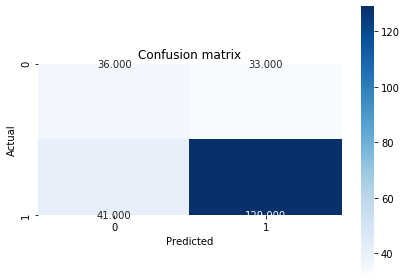

In [40]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [41]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6903765690376569
0.3096234309623431
[0.46753247 0.7962963 ]
[0.52173913 0.75882353]
[0.49315068 0.77710843]


In [42]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 1002 to 1065
Data columns (total 13 columns):
Total Population                         956 non-null float64
Percent White, not Hispanic or Latino    956 non-null float64
Percent Black, not Hispanic or Latino    956 non-null float64
Percent Hispanic or Latino               956 non-null float64
Percent Foreign Born                     956 non-null float64
Percent Female                           956 non-null float64
Percent Age 29 and Under                 956 non-null float64
Percent Age 65 and Older                 956 non-null float64
Median Household Income                  956 non-null float64
Percent Unemployed                       956 non-null float64
Percent Less than High School Degree     956 non-null float64
Percent Less than Bachelor's Degree      956 non-null float64
Percent Rural                            956 non-null float64
dtypes: float64(13)
memory usage: 104.6 KB


In [66]:
# TASK 4
# K nearest neighbour k = 4 and with 2 parameters   [0.515625   0.82285714]
model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [44]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [45]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 33  36]
 [ 26 144]]


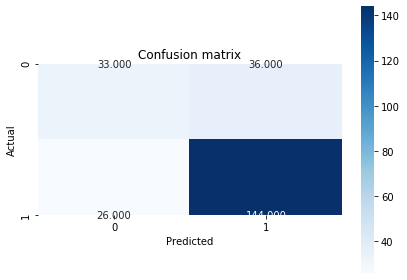

In [46]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [47]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7405857740585774
0.2594142259414226
[0.55932203 0.8       ]
[0.47826087 0.84705882]
[0.515625   0.82285714]


In [48]:
# TASK 4
# K nearest neighbour k = 4 and with 3 parameters  0.52307692 / 0.82183908
model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [52]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [53]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 34  35]
 [ 27 143]]


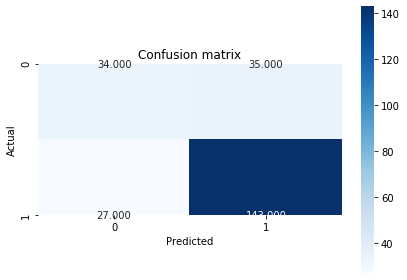

In [54]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [55]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7405857740585774
0.2594142259414226
[0.55737705 0.80337079]
[0.49275362 0.84117647]
[0.52307692 0.82183908]


In [68]:
# TASK 4
# K nearest neighbour k = 4 and with 3 parameters  [0.55813953 0.83667622]
model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [69]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino"]]
y_pred = model.predict(x_test)

In [70]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 36  33]
 [ 24 146]]


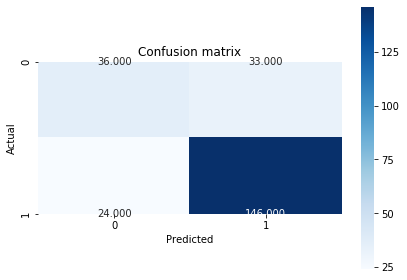

In [71]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [72]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7615062761506276
0.2384937238493724
[0.6        0.81564246]
[0.52173913 0.85882353]
[0.55813953 0.83667622]


In [73]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters   [0.45945946 0.75757576]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Foreign Born"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [74]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Foreign Born"]]
y_pred = model.predict(x_test)

In [75]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 34  35]
 [ 45 125]]


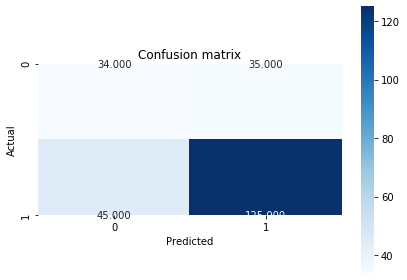

In [76]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [77]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6652719665271967
0.33472803347280333
[0.43037975 0.78125   ]
[0.49275362 0.73529412]
[0.45945946 0.75757576]


In [ ]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters   [0.45945946 0.75757576]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Female"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

In [78]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Female"]]
y_pred = model.predict(x_test)

In [79]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 69   0]
 [167   3]]


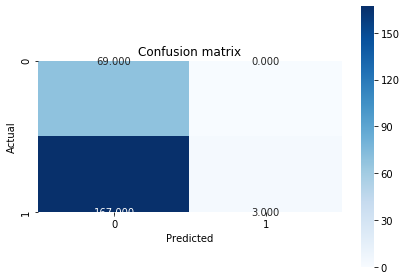

In [80]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [81]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.301255230125523
0.698744769874477
[0.29237288 1.        ]
[1.         0.01764706]
[0.45245902 0.03468208]


In [82]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters  [0.42758621 0.75075075]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Age 29 and Under"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [83]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Age 29 and Under"]]
y_pred = model.predict(x_test)

In [84]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 31  38]
 [ 45 125]]


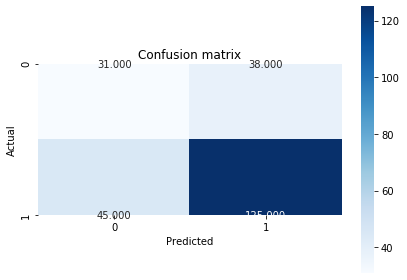

In [85]:
# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [86]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6527196652719666
0.34728033472803344
[0.40789474 0.76687117]
[0.44927536 0.73529412]
[0.42758621 0.75075075]


In [93]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters  [[0.45112782 0.7884058 ]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Age 65 and Older"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [94]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Age 65 and Older"]]
y_pred = model.predict(x_test)

[[ 30  39]
 [ 34 136]]
0.694560669456067
0.305439330543933
[0.46875    0.77714286]
[0.43478261 0.8       ]
[0.45112782 0.7884058 ]


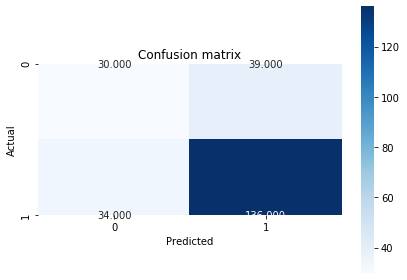

In [95]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [90]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters  [0.48920863 0.79056047]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Median Household Income"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [91]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Median Household Income"]]
y_pred = model.predict(x_test)

[[ 34  35]
 [ 36 134]]
0.702928870292887
0.297071129707113
[0.48571429 0.79289941]
[0.49275362 0.78823529]
[0.48920863 0.79056047]


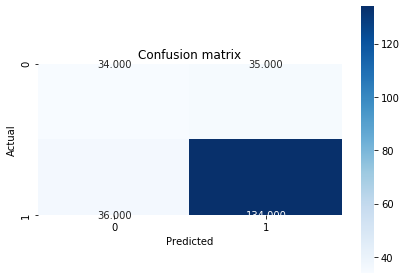

In [92]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [98]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters  [0.44285714 0.76923077]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Unemployed"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [99]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Unemployed"]]
y_pred = model.predict(x_test)

[[ 31  38]
 [ 40 130]]
0.6736401673640168
0.3263598326359832
[0.43661972 0.77380952]
[0.44927536 0.76470588]
[0.44285714 0.76923077]


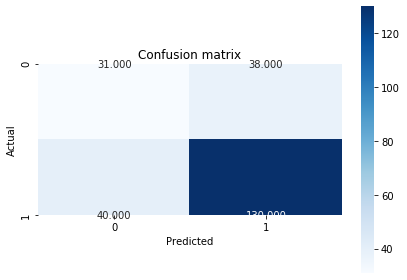

In [100]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [101]:
# TASK 4
# K nearest neighbour k = 4 and with 4 parameters  [0.58267717 0.84900285]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Less than High School Degree"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [102]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Less than High School Degree"]]
y_pred = model.predict(x_test)

[[ 37  32]
 [ 21 149]]
0.7782426778242678
0.22175732217573219
[0.63793103 0.82320442]
[0.53623188 0.87647059]
[0.58267717 0.84900285]


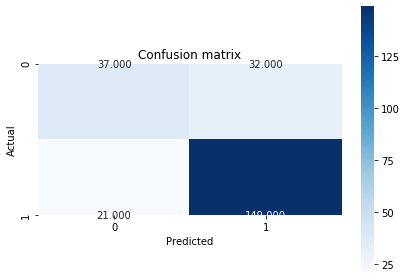

In [103]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [110]:
# TASK 4
# K nearest neighbour k = 4 and with 5 parameters  [0.57575758 0.83815029]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Less than High School Degree","Percent Less than Bachelor's Degree"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [113]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Less than High School Degree","Percent Less than Bachelor's Degree"]]
y_pred = model.predict(x_test)

[[ 38  31]
 [ 25 145]]
0.7656903765690377
0.2343096234309623
[0.6031746  0.82386364]
[0.55072464 0.85294118]
[0.57575758 0.83815029]


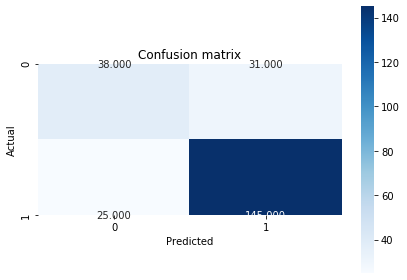

In [114]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [115]:
# TASK 4
# K nearest neighbour k = 4 and with 5 parameters  [0.53030303 0.82080925]

model = KNeighborsClassifier(n_neighbors = 4)
x = x_train[["Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino","Percent Less than High School Degree","Percent Rural"]]
y = y_train.iloc[:,2:]
model.fit(x, y)

/Users/michaelybarra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [116]:
# TASK 4
# Predict class labels using KNearest Neighbour
x_test = x_val[["Total Population", "Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino","Percent Less than High School Degree","Percent Rural"]]
y_pred = model.predict(x_test)

[[ 35  34]
 [ 28 142]]
0.7405857740585774
0.2594142259414226
[0.55555556 0.80681818]
[0.50724638 0.83529412]
[0.53030303 0.82080925]


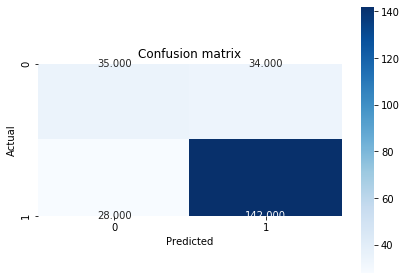

In [117]:
# TASK 4
# Compute confusion matrix
y_test = y_val.iloc[:, 2:]
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# TASK 4
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [ ]:
#in case of k nearest neighbor classifer with k=4, the model with 4 parameters:
# "Total Population", "Percent White, not Hispanic or Latino","Percent Hispanic or Latino",
# "Percent Less than High School Degree"
# has the best performance. 
# [0.58267717 0.84900285]


In [ ]:
# TASK 4
# Naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# CLASSIFIER: Naive Bayes
# Initialize Naive Bayes classifier with all parameters
classifier = GaussianNB()
x = x_train
y = y_train.iloc[:,2:]
classifier.fit(x, y)

In [ ]:
# Predict class labels using Naive Bayes classifier
y_pred = classifier.predict(x_test)

In [ ]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
# TASK 4
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score